In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [44]:
def hundred_points(interval=30,two_point_percentatge=1.,three_point_percentage=1.,flag=False):
    total_seconds = 24 * 60
    attempts = math.floor(total_seconds / interval)
    two_point_attempts = np.arange(0,attempts + 1, 1)
    three_point_attempts = attempts - two_point_attempts
    scores = two_point_attempts * 2 * two_point_percentatge + three_point_attempts * 3 * three_point_percentage
    if flag:
        fig,ax = plt.subplots(figsize=(16,8))
        ax.plot(two_point_attempts,scores,'-*')
        ax.axhline(100,linestyle = '--')
        _=ax.set(xticks=two_point_attempts,xlabel='two-point attempts',ylabel='Total score if make all shots')
    return [[(0,100),(two_point_attempts[-1],100)],[(two_point_attempts[0],scores[0]),(two_point_attempts[-1],scores[-1])],attempts]

[[(0, 100), (48, 100)], [(0, 115.2), (48, 76.800000000000011)], 48]

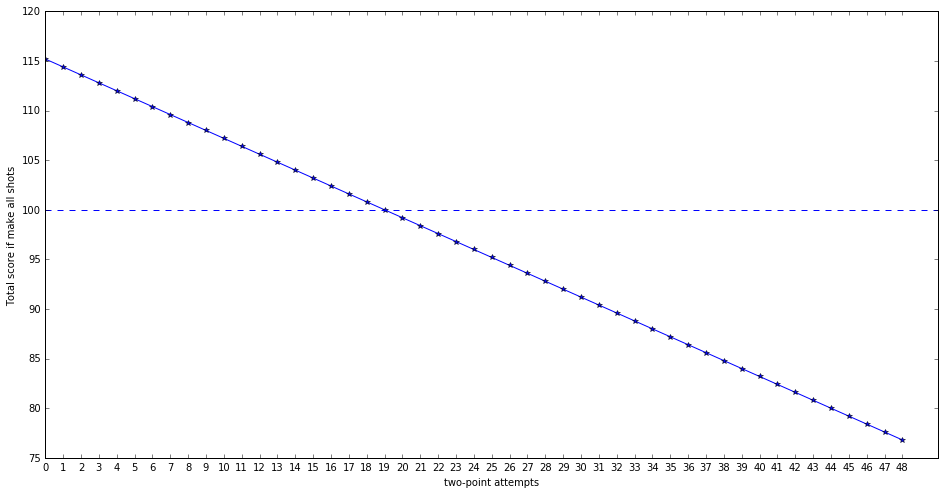

In [46]:
hundred_points(30,.8,.8,True)

In [41]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    if ((l2[1][1] - l2[0][1]) < 0).astype(int):
        if (x > line1[1][0]) :
            return 'over' # should be 'always'
        elif x < 0:
            return 'less' # should be 'never'
        else:
            return x, y
    else:
        if (x > line1[1][1]) :
            return 'less' # should be 'never'
        elif x < 0:
            return 'over' # should be 'always'
        else:
            return x, y


In [47]:
result = []
intervals = np.arange(10,60,1)
two_point_ptgs = np.arange(.36,.86,0.05)
three_point_ptgs = np.arange(.33,.86,0.03)
for interval in intervals:
    for two_point_ptg in two_point_ptgs:
        for three_point_ptg in three_point_ptgs:
            try:
                l1,l2,attempts=hundred_points(interval,two_point_ptg,three_point_ptg)
                slope = ((l2[1][1] - l2[0][1]) > 0).astype(int)
                result.append([interval,two_point_ptg,three_point_ptg,line_intersection(l1,l2)[0],slope,attempts])
            except:
                pass

In [48]:
for item in result:
    print(item)

[10, 0.35999999999999999, 0.33000000000000002, 'o', 0, 144]
[10, 0.35999999999999999, 0.35999999999999999, 'o', 0, 144]
[10, 0.35999999999999999, 0.38999999999999996, 'o', 0, 144]
[10, 0.35999999999999999, 0.41999999999999993, 'o', 0, 144]
[10, 0.35999999999999999, 0.4499999999999999, 'o', 0, 144]
[10, 0.35999999999999999, 0.47999999999999987, 'o', 0, 144]
[10, 0.35999999999999999, 0.50999999999999979, 'o', 0, 144]
[10, 0.35999999999999999, 0.53999999999999981, 'o', 0, 144]
[10, 0.35999999999999999, 0.56999999999999984, 'o', 0, 144]
[10, 0.35999999999999999, 0.59999999999999976, 'o', 0, 144]
[10, 0.35999999999999999, 0.62999999999999967, 'o', 0, 144]
[10, 0.35999999999999999, 0.6599999999999997, 'o', 0, 144]
[10, 0.35999999999999999, 0.68999999999999972, 'o', 0, 144]
[10, 0.35999999999999999, 0.71999999999999964, 'o', 0, 144]
[10, 0.35999999999999999, 0.74999999999999956, 'o', 0, 144]
[10, 0.35999999999999999, 0.77999999999999958, 'o', 0, 144]
[10, 0.35999999999999999, 0.80999999999999

In [95]:
intersect=[]
for item in result:
    if (item[-3] is 'l') or (item[-3] is 'o') :
        pass
    else:
        intersect.append([item[0],item[1],item[2],item[-3],item[-2],item[-1]])

In [96]:
import pandas as pd
intersect = pd.DataFrame(intersect,
                         columns=['interval','two_point_ptg','three_point_ptg','minimum twos','slop','all_attempts'])

In [97]:
intersect

,interval,two_point_ptg,three_point_ptg,minimum twos,slop,all_attempts
0,11,0.36,0.33,106.296296,0,130
1,11,0.36,0.36,112.222222,0,130
2,11,0.36,0.39,115.777778,0,130
3,11,0.36,0.42,118.148148,0,130
4,11,0.36,0.45,119.841270,0,130
5,11,0.36,0.48,121.111111,0,130
6,11,0.36,0.51,122.098765,0,130
7,11,0.36,0.54,122.888889,0,130
8,11,0.36,0.57,123.535354,0,130
9,11,0.36,0.60,124.074074,0,130


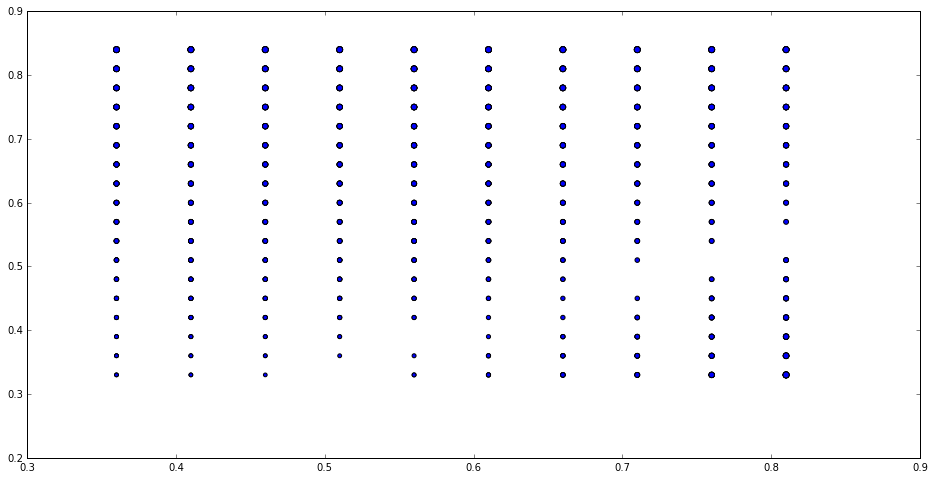

In [89]:
intersect = np.array(intersect)
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(intersect[:,1],intersect[:,2],s=intersect[:,0])


Dear Dr. Miller,

My name is Ning Mei and I was one of the candidates on Interview Day.

You showed me a model of decision making based on integrating information from multiple input time points which I found fancinating. I am looking forward to reading your findings on your update on the engineering of the integral feedback control. I deeply appreciate how you invested time in explaining your model in detail to me, as well as showing me its flaws. 

Thank you for helping me expand my understanding of what we can do with computational neuroscience.

Again, thank you very much for making time to talk to me,

Sincerely,
Ning